In [28]:
import panel as pn
pn.extension('plotly')
from panel.interact import interact
from panel import widgets
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
from pathlib import Path
from dotenv import load_dotenv #Just in case we need an API key.
import requests
import json
import numpy as np
%matplotlib inline
from datetime import date
from datetime import timedelta

In [29]:
BTC_path, ETH_path, LTC_path = (Path('Coinbase_BTCUSD_dailydata.csv'),
                                Path('Coinbase_ETHUSD_dailydata.csv'),
                                Path('Coinbase_LTCUSD_dailydata.csv'))
BTC_df, ETH_df, LTC_df = (pd.read_csv(BTC_path, index_col='date', infer_datetime_format=False, parse_dates=True),
                          pd.read_csv(ETH_path, index_col='date', infer_datetime_format=False, parse_dates=True),
                          pd.read_csv(LTC_path, index_col='date', infer_datetime_format=False, parse_dates=True))

In [30]:
#This function is to create our main datasets. Please edit and comment on how we should approach this.
def clean_data(df):
    df = df.dropna() # immediately drop any null values
    df = df.drop(columns=['unix']).copy() #create deep copy of df with desired columns
    df['volume_change'] = df['volume'].pct_change() #find daily percent change in volume
    df['percent_volatility'] = round(((df['high'] - df['low']) / df['high']) * 100, 2) #Finding the amount of change between the low and high, then comparing it to the high.
    df['daily_change'] = round(df['close'].pct_change(), 5) # daily pct change
    df.drop(df.head(2).index, inplace=True) # drop the unfinished and upcoming day, inclusive of NA data
    df.sort_index(inplace=True)
    return pd.DataFrame(df)
def clean_new_data(df):
    return df.dropna()
#these are the base data sets so far
BTC_df = clean_data(BTC_df)
ETH_df = clean_data(ETH_df)
LTC_df = clean_data(LTC_df)

In [31]:
#joined columns into new dataframe and renamed
BTC_close = BTC_df['close']
ETH_close = ETH_df['close']
LTC_close = LTC_df['close']
close_df = clean_new_data(pd.concat([BTC_close, ETH_close, LTC_close], axis=1))
close_df.columns = ['BTC_close', 'ETH_close', 'LTC_close']
ETH_LTC_close_df = clean_new_data(close_df.drop(columns='BTC_close'))


In [32]:
#Rename crypto currency columns
BTC_df.columns = ['BTC_low', 'BTC_high', 'BTC_open', 'BTC_close', 'BTC_volume', 'BTC_volume_change',
       'BTC_percent_volatility', 'BTC_daily_change']
ETH_df.columns = ['ETH_low', 'ETH_high', 'ETH_open', 'ETH_close', 'ETH_volume', 'ETH_volume_change',
       'ETH_percent_volatility', 'ETH_daily_change']
LTC_df.columns = ['LTC_low', 'LTC_high', 'LTC_open', 'LTC_close', 'LTC_volume', 'LTC_volume_change',
       'LTC_percent_volatility', 'LTC_daily_change']

In [33]:
#combined crypto dataframe
crypto_combined = pd.concat([BTC_df, ETH_df, LTC_df], axis=1, join="outer")
crypto_combined

,BTC_low,BTC_high,BTC_open,BTC_close,BTC_volume,BTC_volume_change,BTC_percent_volatility,BTC_daily_change,ETH_low,ETH_high,...,ETH_percent_volatility,ETH_daily_change,LTC_low,LTC_high,LTC_open,LTC_close,LTC_volume,LTC_volume_change,LTC_percent_volatility,LTC_daily_change
date,,,,,,,,,,,,,,,,,,,,,
2015-07-20,277.37,280.00,277.98,280.00,782.883420,-0.841636,0.94,0.00966,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-21,276.85,281.27,279.96,277.32,4943.559434,0.054534,1.57,-0.00205,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-22,275.01,278.54,277.33,277.89,4687.909383,-0.116642,1.27,0.00180,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-23,276.28,279.75,277.96,277.39,5306.919575,-0.279193,1.24,-0.04057,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-24,276.43,291.52,277.23,289.12,7362.469083,0.794650,5.18,-0.00200,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-25,286.82,291.67,289.12,289.70,4102.452960,0.098308,1.66,-0.01426,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-26,288.65,294.49,289.68,293.89,3735.246603,-0.421881,1.98,-0.00109,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-27,287.24,297.00,293.88,294.21,6461.033135,0.121343,3.29,-0.00524,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-28,293.65,298.00,294.22,295.76,5761.869618,0.103065,1.46,0.01919,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
#correlation
#correlation_df = correlation_df.assign(crypto_combined['BTC_close'], crypto_combined['ETH_close'])  
correlation_df = pd.concat([crypto_combined['BTC_close'], crypto_combined['ETH_close'], crypto_combined['LTC_close']], axis=1, join="outer")


In [90]:
correlation_df.dtypes

BTC_close    float64
ETH_close    float64
LTC_close    float64
dtype: object

In [70]:
correlation_change = correlation_df.pct_change()
correlation_change

,BTC_close,ETH_close,LTC_close
date,,,
2015-07-20,nan,nan,nan
2015-07-21,-0.01,nan,nan
2015-07-22,0.00,nan,nan
2015-07-23,-0.00,nan,nan
2015-07-24,0.04,nan,nan
2015-07-25,0.00,nan,nan
2015-07-26,0.01,nan,nan
2015-07-27,0.00,nan,nan
2015-07-28,0.01,nan,nan


In [79]:
correlation_df.to_csv("correlation_df")

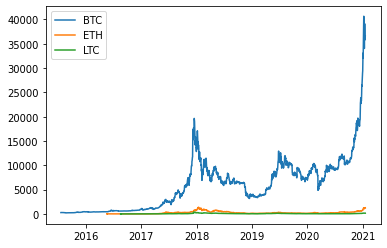

In [72]:
plt.plot(correlation_df)
plt.legend(['BTC', 'ETH', 'LTC'], loc=2)

In [73]:
#df['Asset1'].rolling(10).corr(df['Asset2'])
rollingcorr_df = correlation_change['BTC_close'].rolling(20).corr(correlation_change['ETH_close'])

In [74]:
rollingcorr_df.hvplot(kind='line', title='Correlation by Year')
#add moving average

:Curve   [date]   (0)

In [75]:
#rolling
rollingcorr_df.hvplot(kind='line', title='Correlation by Year', groupby=['date.year'])

:DynamicMap   [date.year]
   :Curve   [date]   (0)

In [76]:
#returns_filtered = returns['20180101':'20181231']
correlation_change.hvplot(kind='line', title='Price Plot by Month', groupby=['date.year', 'date.month'])

:DynamicMap   [date.year,date.month]
   :NdOverlay   [Variable]
      :Curve   [date]   (value)

In [78]:
correlation_change.to_csv('correlation_change_df')

C:\Users\Zarbin\anaconda3\envs\pyvizenv\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\Zarbin\anaconda3\envs\pyvizenv\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\Zarbin\anaconda3\envs\pyvizenv\lib\site-packages\pandas\plotting\_tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\Zarbin\anaconda3\envs\pyvizenv\lib\site-pack

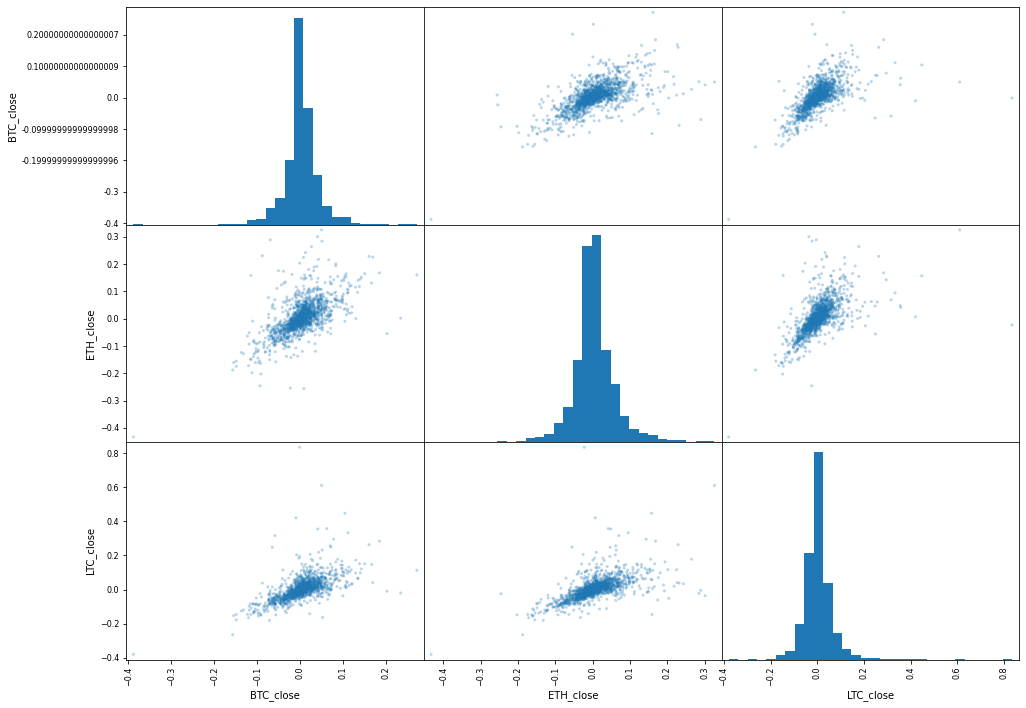

In [77]:
#from pandas.plotting import scatter_matrix
scatter_matrix(correlation_change, figsize=(16,12), diagonal='hist', alpha=0.3, hist_kwds={'bins':30})
pd.options.display.float_format = '{:.2f}'.format
#yformatter to fix column